<a href="https://colab.research.google.com/github/coolkite/machine_translation/blob/main/English%20To%20Spanish/%20English%20To%20Spanish%20Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!wget http://www.manythings.org/anki/spa-eng.zip

--2023-04-28 10:05:57--  http://www.manythings.org/anki/spa-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5359219 (5.1M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   5.11M  17.0MB/s    in 0.3s    

2023-04-28 10:05:57 (17.0 MB/s) - ‘spa-eng.zip’ saved [5359219/5359219]



In [ ]:
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.42B.300d.zip

--2023-04-28 10:06:05--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.42B.300d.zip
Resolving huggingface.co (huggingface.co)... 52.84.162.18, 52.84.162.45, 52.84.162.46, ...
Connecting to huggingface.co (huggingface.co)|52.84.162.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/stanfordnlp/glove/357baac33090f645e71e253b3295ee1b767c98a0336e9a1d99c77e9e33b43c4a?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27glove.42B.300d.zip%3B+filename%3D%22glove.42B.300d.zip%22%3B&response-content-type=application%2Fzip&Expires=1682935565&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3N0YW5mb3JkbmxwL2dsb3ZlLzM1N2JhYWMzMzA5MGY2NDVlNzFlMjUzYjMyOTVlZTFiNzY3Yzk4YTAzMzZlOWExZDk5Yzc3ZTllMzNiNDNjNGE%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNjgyOTM1NTY1fX19XX0_&Signature=wRRbZPrPM

unloading all the files in the drive

In [ ]:
!cp /content/spa-eng.zip/content/drive/MyDrive/OCR_MODEL/eng_to_spanish

In [ ]:
!cp /content/glove.42B.300d.zip/content/drive/MyDrive/OCR_MODEL/eng_to_spanish

In [ ]:

!unzip /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/spa-eng.zip -d /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/

Archive:  /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/spa-eng.zip
replace /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/_about.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

!unzip /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/glove.42B.300d.zip -d /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/

Archive:  /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/glove.42B.300d.zip
replace /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/glove.42B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip "/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/glove.42B.300d.zip"

Archive:  /content/drive/MyDrive/OCR_MODEL/eng_to_spanish/glove.42B.300d.zip
  inflating: glove.42B.300d.txt      

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.preprocessing import *
from keras.models import Model
from keras.layers import *
from keras.utils import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/spa.txt", sep='\t')

encoder_train = df.iloc[:,0].to_numpy()
decoder_train = df.iloc[:,1].to_numpy()
print(encoder_train.shape, decoder_train.shape)
print(encoder_train[11])
print(decoder_train[11])

(139704,) (139704,)
Who?
¿Quién?


In [ ]:
def tokenize(dataset):
  dataset = ["<BOS> " + train + " <EOS>" for train in dataset]
  token = text.Tokenizer(num_words = None)
  token.fit_on_texts(dataset)
  dataset = token.texts_to_sequences(dataset)
  return dataset, token.word_index

def padding(dataset):
  max_length = max([len(text) for text in dataset])
  dataset = pad_sequences(dataset, maxlen=max_length, padding = 'post', truncating = 'post')
  return max_length, dataset

This code tokenizes and pads the input English and output Spanish sentences in the `encoder_train` and `decoder_train` lists. 

- `tokenize(encoder_train)` and `tokenize(decoder_train)` tokenize the English and Spanish sentences respectively, and returns the tokenized sentences and the dictionaries mapping the words to their indices in the tokenized sequences.
- `padding(encoder_train)` and `padding(decoder_train)` pad the tokenized sequences to make them of equal length. The maximum sequence length is stored in `max_enc_seq_length` and `max_dec_seq_length`. The padded sequences are stored in `enc_train_pad` and `dec_train_pad`.
- The code then saves the English and Spanish dictionaries to files named `'engTokenizer.pickle'` and `'spaTokenizer.pickle'` using the pickle library.

Overall, this code prepares the data for training a neural machine translation model.

In [ ]:
import pickle

encoder_train, enc_dict = tokenize(encoder_train)
decoder_train, dec_dict = tokenize(decoder_train)
print(encoder_train[11])

max_enc_seq_length, enc_train_pad = padding(encoder_train)
max_dec_seq_length, dec_train_pad = padding(decoder_train)
print(enc_train_pad[11])
print(max_enc_seq_length)
print(dec_train_pad[11])
print(max_dec_seq_length)

print(enc_dict)

with open('engTokenizer.pickle', 'wb') as handle:
    pickle.dump(enc_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('spaTokenizer.pickle', 'wb') as handle:
    pickle.dump(dec_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

print()

[1, 81, 2]
[ 1 81  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
72
[  1 138   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
70
{'bos': 1, 'eos': 2, 'i': 3, 'the': 4, 'to': 5, 'you': 6, 'tom': 7, 'a': 8, 'is': 9, 'he': 10, 'in': 11, 'that': 12, 'of': 13, 'it': 14, 'do': 15, 'was': 16, 'me': 17, 'this': 18, 'have': 19, 'my': 20, "don't": 21, 'for': 22, 'are': 23, 'what': 24, 'your': 25, 'we': 26, 'she': 27, "i'm": 28, 'mary': 29, 'be': 30, 'his': 31, 'on': 32, 'want': 33, 'with': 34, 'not': 35, 'and': 36, 'like': 37, 'know': 38, 'at': 39, 'can': 40, 'go': 41, 'him': 42, "it's": 43, 'has': 44, 'how': 

In [ ]:
embeddings_index = {}
f = open('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/glove.42B.300d.txt')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

1917495it [02:33, 12516.92it/s]




In the context of NLP, GloVe is often used to pretrain word embeddings, which can then be used as the initial weights for the embedding layer in a neural network. This can help improve the performance of the model, especially when the training data is limited. However, the embedding layer in the neural network can also learn and adjust the word embeddings during training, so the final embeddings may be different from the pretrained GloVe embeddings.


---





spanish dataset was very vague and basic so inorder to get a better prediction we added glove function as it is used to pretrain word embeddings, which can then be used as the initial weights for the embedding layer in a neural network. This can help improve the performance of the model, especially when the training data is limited.


In [ ]:
def Glove(latentDim, dictionary):
  embedding_matrix = np.zeros((len(dictionary) + 1, latentDim))
  for word, i in tqdm(dictionary.items()):
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector
  
  return embedding_matrix


as we have a limited dataset so inorder to compensate for this
we made a dynamic model which split gru layer into 2 parts which would be played one after the other


---



In the context of sequence-to-sequence models, such as machine translation, speech recognition, or summarization, the encoder and decoder are two parts of a neural network architecture.

The encoder takes the input sequence, such as a sentence in natural language, and transforms it into a fixed-length vector representation, called the "context vector." This vector is intended to capture the meaning of the input sequence in a compressed and continuous format.

The decoder takes this context vector as input and generates an output sequence, such as a translation of the input sentence into another language. It does this by using a recurrent neural network (RNN) or similar architecture to generate one token of the output sequence at a time, conditioned on the context vector and the previously generated tokens.

Together, the encoder and decoder form an end-to-end system that can translate or transform sequences of arbitrary length and complexity.

100%|██████████| 28969/28969 [00:00<00:00, 334355.51it/s]


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 72)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 72, 300)      4290900     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 70)]         0           []                               
                                                                                                  
 gru (GRU)                      [(None, 72, 300),    541800      ['embedding[0][0]']              
                                 (None, 300)]                                                 

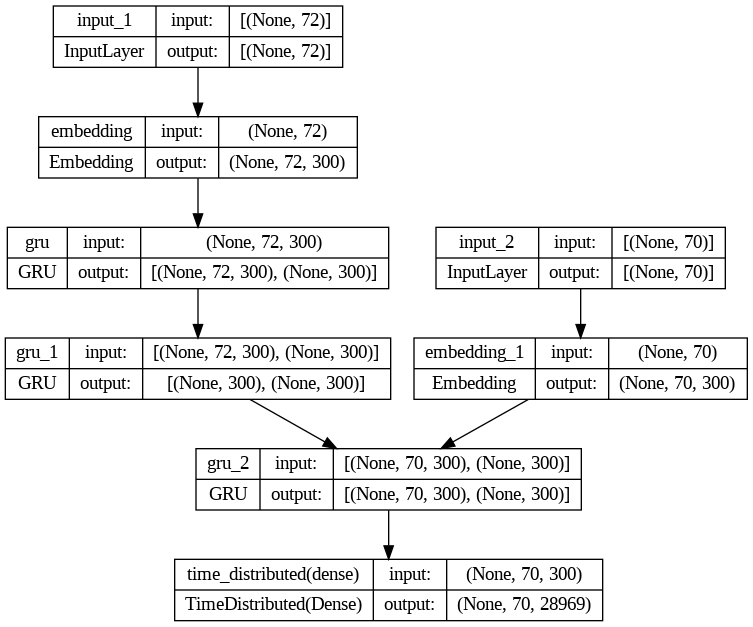

In [ ]:
latentDim = 300
UNIQUE_ENC_WORDS = len(enc_dict)
UNIQUE_DEC_WORDS = len(dec_dict)

with strategy.scope():
  encoder_input = Input(shape=(max_enc_seq_length,))
  mid_encoder_layer = GRU(latentDim, return_sequences = True, return_state=True)
  final_encoder_layer = GRU(latentDim, return_state=True)
  encoder_embed = Embedding(UNIQUE_ENC_WORDS+1, latentDim, weights = [Glove(latentDim, enc_dict)], input_length=max_enc_seq_length, trainable = False)(encoder_input)
  encoder_1 = mid_encoder_layer(encoder_embed)
  encoder_output, encoder_hidden = final_encoder_layer(encoder_1)

  decoder_input = Input(shape = (max_dec_seq_length,))
  decoder_embed = Embedding(UNIQUE_DEC_WORDS+1, latentDim, weights = [Glove(latentDim, dec_dict)], input_length=max_dec_seq_length, trainable = False)(decoder_input)
  decoder_layer = GRU(latentDim, return_sequences=True, return_state=True)
 
  decoder_output, _ = decoder_layer(decoder_embed, initial_state = encoder_hidden)

  output_layer = TimeDistributed(Dense(UNIQUE_DEC_WORDS, activation="softmax"))(decoder_output)

  model = Model([encoder_input, decoder_input], output_layer)
  model.summary()
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

plot_model(model, to_file='model.png', show_shapes=True)


This code creates a new variable `decoder_target` that is used to train a machine learning model for sequence to sequence prediction. 

The `dec_train_pad` variable contains sequences of words in the target language (in this case, Spanish), that have been padded to the same length. Each sequence has one word for each time step.

The purpose of `decoder_target` is to provide the expected output for the model during training. It is created by taking each sequence in `dec_train_pad`, shifting it one time step to the left, and then adding a zero at the end. The resulting sequence is the expected output for each input sequence, with each word shifted one position to the left. 

By using `decoder_target` during training, the model is encouraged to predict the correct next word at each time step, rather than simply memorizing the correct output sequence.

In [ ]:
decoder_target = [np.append(arr[1:],0) for arr in dec_train_pad]
decoder_target = np.array(decoder_target)

if we do:
basically what this part will do is create **dummy array** which will save each result of gru to train the model to get unique predictions


In [ ]:
print(enc_train_pad.shape, dec_train_pad.shape, decoder_target.shape)
print(enc_train_pad[137859], dec_train_pad[137859], decoder_target[137859])

(139704, 72) (139704, 70) (139704, 70)
[   1    3   19  134 1191   20  183    4  183  277   12  576   11    4
  289 1030  689    2    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0] [    1    95    68 15021     7    21   146    22     8   220     3   146
     4   387    10     8  1101  1228   290     2     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0] [   95    68 15021     7    21   146    22     8   220     3   146     4
   387    10     8  1101  1228   290     2     0     0     0     0     0
     0     0     0   

In [ ]:
history = model.fit([enc_train_pad, dec_train_pad], 
                    decoder_target, 
                    batch_size = 128*strategy.num_replicas_in_sync,
                    epochs = 30,
                    validation_split = 0.3,
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                    shuffle = True
                    )

Epoch 1/30
764/764 [==============================] - 403s 511ms/step - loss: 0.5695 - accuracy: 0.9350 - val_loss: nan - val_accuracy: 0.8907
Epoch 2/30
764/764 [==============================] - 394s 516ms/step - loss: 0.2917 - accuracy: 0.9526 - val_loss: nan - val_accuracy: 0.9056
Epoch 3/30
764/764 [==============================] - 395s 517ms/step - loss: 0.1967 - accuracy: 0.9627 - val_loss: nan - val_accuracy: 0.9109
Epoch 4/30
293/764 [==========>...................] - ETA: 3:23 - loss: 0.1473 - accuracy: 0.9686

KeyboardInterrupt: ignored

In [ ]:
model.save("engToSpaFin.h5")